In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv('data.csv')

In [6]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [7]:
df.shape

(400, 24)

In [8]:
target_names=list(df['Type'].unique())

In [47]:
df_new = pd.concat([df] * 2500, ignore_index=True)

In [9]:
x=df.drop(['Type'],1)
y=df['Type'].copy()

/local_scratch/pbs.555512.pbs02/ipykernel_1233724/1006572068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop(['Type'],1)


In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [11]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(xtrain)
X_test_scale = scaler.transform(xtest)

In [12]:
kRange = range(1,15,1)

scores_list = []

for i in kRange:
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scale,ytrain)
    ypredr = knn.predict(X_test_scale)
Acc_KNN=accuracy_score(ypredr, ytest)

print('accuracy',Acc_KNN)

accuracy 0.8666666666666667


In [13]:
dtr = DecisionTreeClassifier(random_state=32)
dtr.fit(X_train_scale, ytrain)
ypreddtf = dtr.predict(X_test_scale)
Acc_DTC=accuracy_score(ypreddtf, ytest)
print('accuracy',Acc_DTC)

accuracy 0.8166666666666667


In [14]:
# Create MLP model
mlp = MLPClassifier(activation='relu',
                    hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

# Fit the trained data into model
mlp.fit(X_train_scale, ytrain)

# Get predicted class values for each iteration
ypredmlp = mlp.predict(X_test_scale)

# Calculate accuracy score
Acc_mlp=accuracy_score(ypredmlp,ytest)

print('accuracy', Acc_mlp)

accuracy 0.8916666666666667


/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# MLP
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredmlp, target_names=target_names))

                               precision    recall  f1-score   support

   Typical aura with migraine       0.50      0.67      0.57         3
        Migraine without aura       0.75      0.38      0.50         8
            Basilar-type aura       0.94      1.00      0.97        15
 Sporadic hemiplegic migraine       0.75      0.75      0.75         4
 Familial hemiplegic migraine       0.29      0.67      0.40         3
                        Other       0.96      0.94      0.95        80
Typical aura without migraine       1.00      1.00      1.00         7

                     accuracy                           0.89       120
                    macro avg       0.74      0.77      0.73       120
                 weighted avg       0.91      0.89      0.89       120



In [16]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (6, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 5,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypredmlp)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 2  0  0  1  0  0  0]
 [ 0  3  0  0  3  2  0]
 [ 0  0 15  0  0  0  0]
 [ 1  0  0  3  0  0  0]
 [ 0  0  0  0  2  1  0]
 [ 1  1  1  0  2 75  0]
 [ 0  0  0  0  0  0  7]]


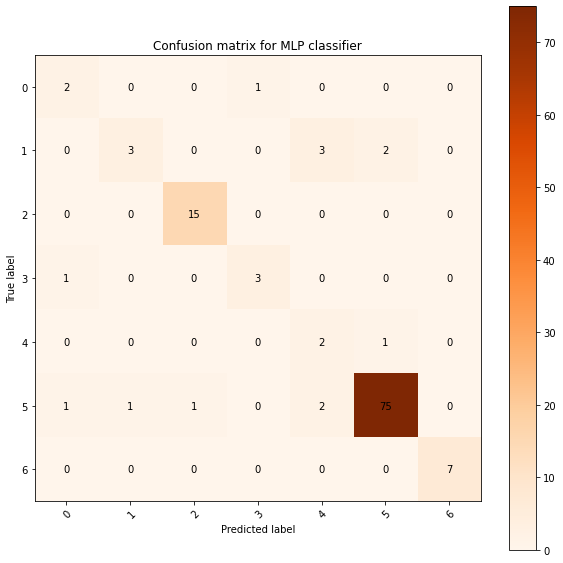

In [18]:
# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Oranges')

# Add labels and colorbar
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(7))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(7):
    for j in range(7):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set_title("Confusion matrix for MLP classifier")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 1.0)
clf.fit(X_train_scale, ytrain)
ypredclf = clf.predict(X_test_scale)
Acc_clf=accuracy_score(ytest,ypredclf)
print('accuracy',Acc_clf)

accuracy 0.925


In [20]:
# SVC
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredclf, target_names=target_names))

                               precision    recall  f1-score   support

   Typical aura with migraine       0.75      1.00      0.86         3
        Migraine without aura       1.00      0.25      0.40         8
            Basilar-type aura       0.94      1.00      0.97        15
 Sporadic hemiplegic migraine       1.00      1.00      1.00         4
 Familial hemiplegic migraine       0.60      1.00      0.75         3
                        Other       0.94      0.96      0.95        80
Typical aura without migraine       1.00      1.00      1.00         7

                     accuracy                           0.93       120
                    macro avg       0.89      0.89      0.85       120
                 weighted avg       0.94      0.93      0.91       120



In [21]:
rfr = RandomForestClassifier(random_state= 32)
rfr.fit(X_train_scale, ytrain)
ypredrfr = rfr.predict(X_test_scale)
Acc_RF=accuracy_score(ypredrfr,ytest)
print('accuracy',Acc_RF)

accuracy 0.9333333333333333


In [22]:
# RF
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredrfr, target_names=target_names))

                               precision    recall  f1-score   support

   Typical aura with migraine       0.60      1.00      0.75         3
        Migraine without aura       1.00      0.38      0.55         8
            Basilar-type aura       0.94      1.00      0.97        15
 Sporadic hemiplegic migraine       1.00      0.75      0.86         4
 Familial hemiplegic migraine       0.67      0.67      0.67         3
                        Other       0.95      0.99      0.97        80
Typical aura without migraine       1.00      1.00      1.00         7

                     accuracy                           0.93       120
                    macro avg       0.88      0.83      0.82       120
                 weighted avg       0.94      0.93      0.93       120



In [29]:
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": rfr.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df.columns

Index(['feature', 'importance'], dtype='object')

roc_auc_score for RF for Other Type vs Rest:  0.7801724137931034


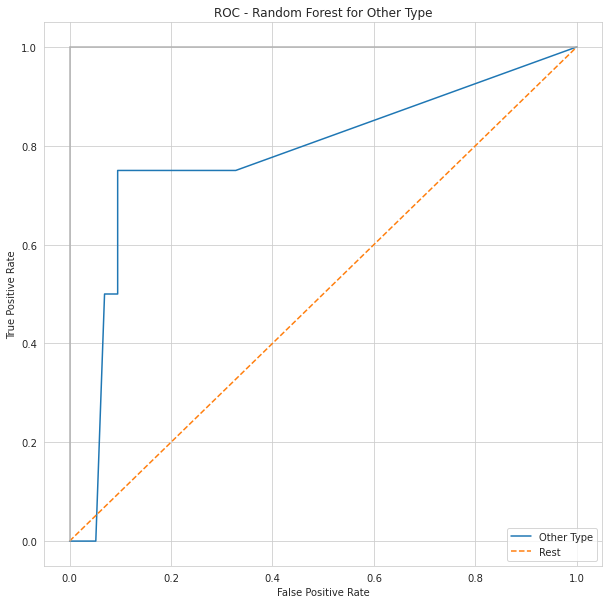

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

#y_testv1 = np.array(ytest["Type"])
y_testv1 = ytest.to_numpy()


y_testv1 = [1 if y == 'Other' else 0 for y in y_testv1]

y_scorev1 = rfr.predict_proba(X_test_scale)[:,0]     

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_testv1, y_scorev1)

print('roc_auc_score for RF for Other Type vs Rest: ', roc_auc_score(y_testv1, y_scorev1))

plt.subplots(1, figsize=(10,10))
plt.title('ROC - Random Forest for Other Type')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['Other Type', 'Rest'])
plt.show()

/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


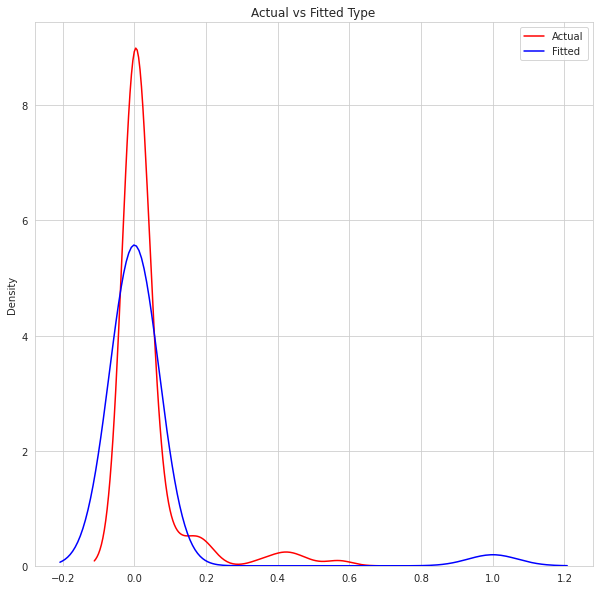

In [98]:
import seaborn as sns
plt.figure(figsize=(10, 10))

y_testv1 = ytest.to_numpy()

y_testv1 = [1 if y == 'Other' else 0 for y in y_testv1]

y_scorev1 = rfr.predict_proba(X_test_scale)[:,0] 

ax = sns.distplot(y_scorev1, hist=False, color="r", label="Actual Type Valu")
sns.distplot(y_testv1, hist=False, color="b", label="Fitted Type Values" , ax=ax)

plt.title('Actual vs Fitted Type')
plt.legend(['Actual', 'Fitted'])
plt.show()
plt.close()

In [82]:
ytest.to_numpy()

array(['Migraine without aura', 'Basilar-type aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Other', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Familial hemiplegic migraine',
       'Other', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura without migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typica

In [79]:
type(ytest)

pandas.core.series.Series

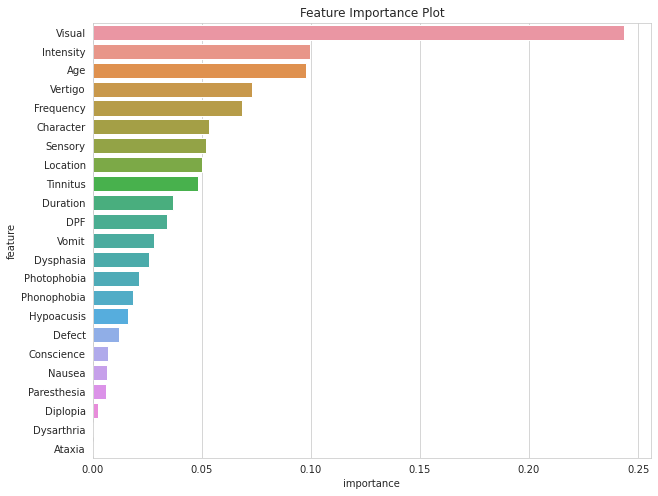

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame named df
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df, ax=ax)
ax.set_title('Feature Importance Plot')
plt.show()

In [17]:
param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
estimator = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
estimator.fit(X_train_scale, ytrain)
grid_predictions = estimator.predict(X_test_scale)
Acc_grid_mlp=accuracy_score(grid_predictions,ytest)
print('accuracy',Acc_grid_mlp)

accuracy 0.8583333333333333


In [18]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','mlp with gridsearch'],
    'Score': [Acc_RF, Acc_mlp, Acc_KNN, Acc_DTC, Acc_clf, Acc_grid_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,0.933333
4,support vector classifier,0.925000
1,MLPClassifier,0.891667
2,KNeighborsClassifier,0.866667
5,mlp with gridsearch,0.858333
3,DecisionTreeClassifier,0.816667


In [26]:
from sklearn.metrics import classification_report
#target_names = [ '1', '2', '3','4','5']
print(classification_report(ytest, ypredrfr, target_names=target_names))

                               precision    recall  f1-score   support

   Typical aura with migraine       0.60      1.00      0.75         3
        Migraine without aura       1.00      0.38      0.55         8
            Basilar-type aura       0.94      1.00      0.97        15
 Sporadic hemiplegic migraine       1.00      0.75      0.86         4
 Familial hemiplegic migraine       0.67      0.67      0.67         3
                        Other       0.95      0.99      0.97        80
Typical aura without migraine       1.00      1.00      1.00         7

                     accuracy                           0.93       120
                    macro avg       0.88      0.83      0.82       120
                 weighted avg       0.94      0.93      0.93       120



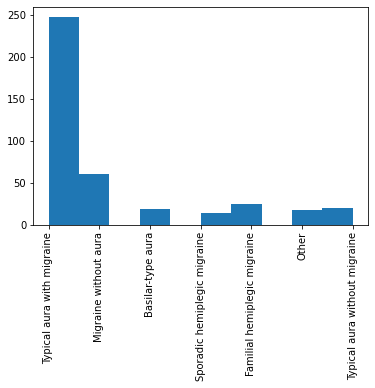

In [31]:
import matplotlib.pyplot as plt
plt.hist(df['Type'])
plt.xticks(rotation='vertical')
plt.show()

[Text(0, 0, 'Typical aura with migraine'),
 Text(1, 0, 'Migraine without aura'),
 Text(2, 0, 'Basilar-type aura'),
 Text(3, 0, 'Sporadic hemiplegic migraine'),
 Text(4, 0, 'Familial hemiplegic migraine'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Typical aura without migraine')]

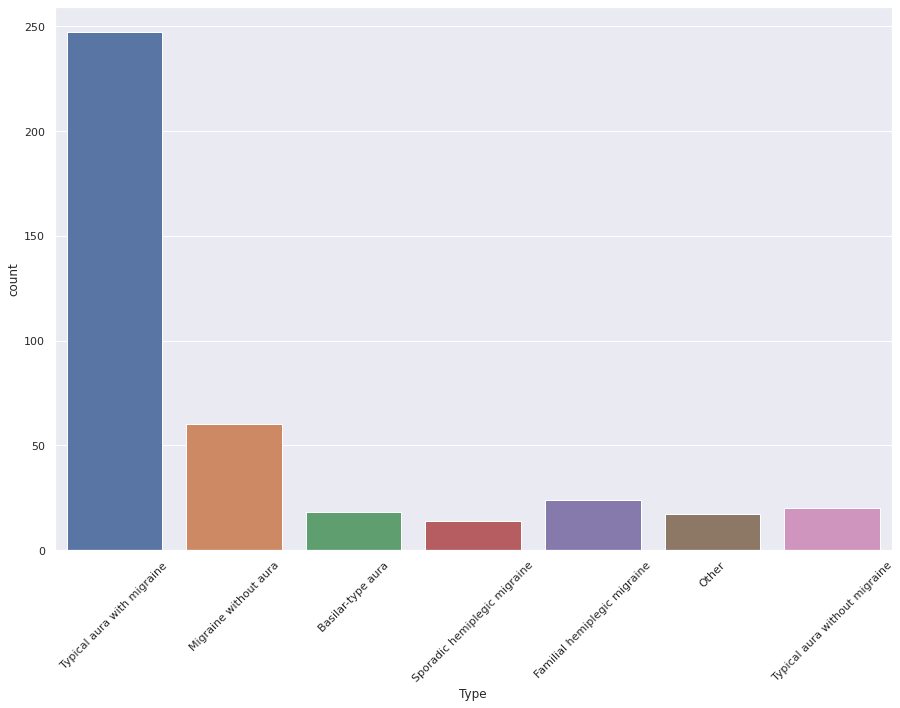

In [39]:
sns.set(rc={'figure.figsize':(15, 10)})
chart = sns.countplot(x=df.Type)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)